# INSURANCE CLAIM FRAUD DETECTION PROJECT:

Name: Vaibhav Tayade
    
Contact: 8087970061

Email Id: vaibhav_t29@rediffmail.com

# IMPORTING RELEVANT LIBRARIES:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# IMPORTING DATAFILE:

In [2]:
# reading csv and creating dataframe:
df = pd.read_csv('insurance.csv')

In [3]:
# checking sample data:
df.sample(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
311,10,26,582973,11-06-2008,IN,100/300,2000,765.64,0,466191,...,?,31350,2850,5700,22800,Honda,Accord,2001,Y,NaN
568,292,42,396002,04-03-2007,IN,250/500,1000,1588.22,0,605369,...,NO,84600,16920,8460,59220,Chevrolet,Malibu,2007,N,NaN


In [4]:
# checking null values in the dataset:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation: column _c39 contains null values.

In [5]:
# checking details of the dataset.
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Observation: In the above details of the dataset, we can see that there are few columns which has mean values higher than median which indicates presence of outliers and skewness in the dataset.
These columns are months_as_customer, age, umbrella_limit, insured_zip, capital-gains, total_claim_amount.

# CHECKING VARIOUS DATASET IN THE COLUMNS:

In [6]:
df['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

In [7]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [8]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [9]:
df['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [10]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [11]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [12]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [13]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [14]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [15]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [16]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [17]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [18]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [19]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [20]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [21]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [22]:
df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [23]:
df['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

In [24]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [25]:
df['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

In [26]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

In [27]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [28]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [29]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [30]:
df['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [31]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [32]:
df['_c39'].unique()

array([nan])

# NOTE:

These are the columns which have no direct relationship with the fraudulant scenarios, dropping such columns will create ease in model making.

months_as_customer,
policy_number,
policy_bind_date,
auto_make,
auto_model,
incident_date,
_c39,

# DROPPING IRRELEVANT COLUMNS:

In [33]:
# dropping irrelevant columns:
df.drop('months_as_customer', axis=1, inplace=True)

In [34]:
df.drop('policy_number', axis=1, inplace=True)

In [35]:
df.drop('policy_bind_date', axis=1, inplace=True)

In [36]:
df.drop('auto_make', axis=1, inplace=True)

In [37]:
df.drop('auto_model', axis=1, inplace=True)

In [38]:
df.drop('incident_date', axis=1, inplace=True)

In [39]:
df.drop('_c39', axis=1, inplace=True)

In [40]:
# checking mode value of collision_type.
df['collision_type'].mode()
# we ll replace ? with Rear Collision

0    Rear Collision
dtype: object

In [41]:
# checking value counts of property_damage column, inturn checking mode value of the column.
df['property_damage'].value_counts()
# we ll replace ? with NO here

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [42]:
# checking mode value of police_report_available.
df['police_report_available'].value_counts()
# we ll replace ? with NO here

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [43]:
# column collision_type contains ? at various places replacing it by mode value of the column.
df['collision_type'] = df['collision_type'].replace(['?'],'Rear Collision')

In [44]:
df['collision_type'].value_counts()
# ? value replaced successfully

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [45]:
# column property_damage contains ? at various places replacing it by mode value of the column.
df['property_damage'] = df['property_damage'].replace(['?'],'NO')

In [46]:
df['property_damage'].value_counts()
# ? value replaced successfully

NO     698
YES    302
Name: property_damage, dtype: int64

In [47]:
# column police_report_available contains ? at various places replacing it by mode value of the column.
df['police_report_available'] = df['police_report_available'].replace(['?'],'NO')

In [48]:
df['police_report_available'].value_counts()
# ? value replaced successfully

NO     686
YES    314
Name: police_report_available, dtype: int64

# CHECKING BOX PLOT OF NEUMERICAL COLUMN:

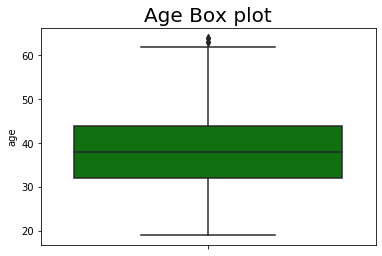

In [49]:
# boxplot 1 >>>
plt.title('Age Box plot', fontsize = 20)
sns.boxplot(df['age'],color='green',orient='v')

Observation: Outliers present in the column.

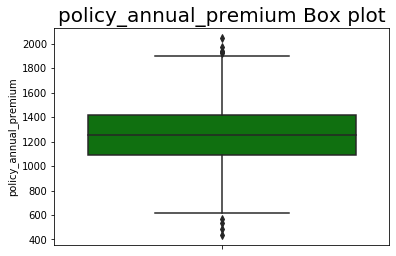

In [50]:
# boxplot 2 >>>
plt.title('policy_annual_premium Box plot', fontsize = 20)
sns.boxplot(df['policy_annual_premium'],color='green',orient='v')

Observation: Outliers present in the column.

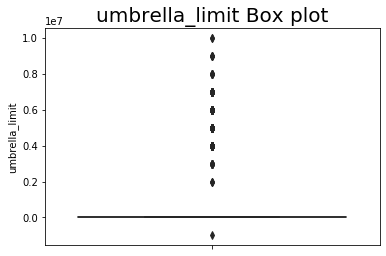

In [51]:
# boxplot 3 >>>
plt.title('umbrella_limit Box plot', fontsize = 20)
sns.boxplot(df['umbrella_limit'],color='green',orient='v')

Observation: Outliers present in the column.

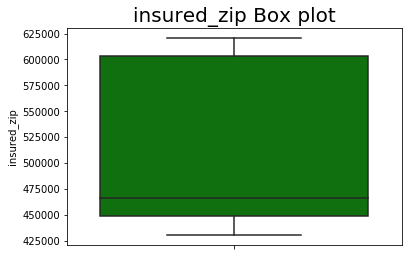

In [52]:
# boxplot 4 >>>
plt.title('insured_zip Box plot', fontsize = 20)
sns.boxplot(df['insured_zip'],color='green',orient='v')

Observation: Outliers not seen in the column.

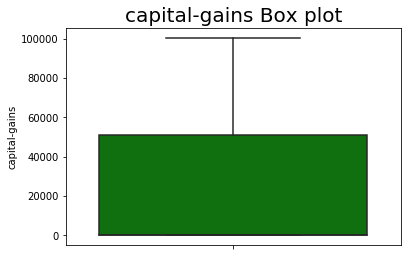

In [53]:
# boxplot 5 >>>
plt.title('capital-gains Box plot', fontsize = 20)
sns.boxplot(df['capital-gains'],color='green',orient='v')

Observation: Outliers not seen in the column.

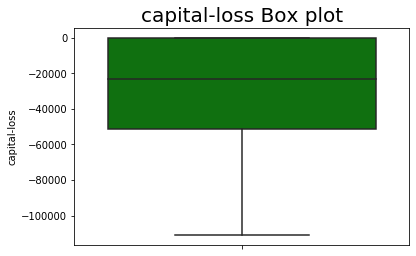

In [54]:
# boxplot 6 >>>
plt.title('capital-loss Box plot', fontsize = 20)
sns.boxplot(df['capital-loss'],color='green',orient='v')

Observation: Outliers not seen in the column.

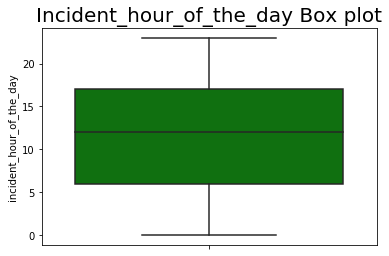

In [55]:
# boxplot 7 >>>
plt.title('Incident_hour_of_the_day Box plot', fontsize = 20)
sns.boxplot(df['incident_hour_of_the_day'],color='green',orient='v')

Observation: Outliers not seen in the column.

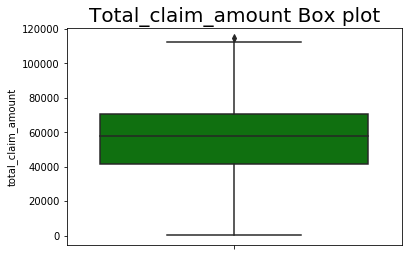

In [56]:
# boxplot 8 >>>
plt.title('Total_claim_amount Box plot', fontsize = 20)
sns.boxplot(df['total_claim_amount'],color='green',orient='v')

Observation: Outliers present in the column.

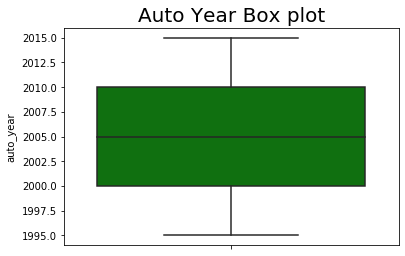

In [57]:
# boxplot 9 >>>
plt.title('Auto Year Box plot', fontsize = 20)
sns.boxplot(df['auto_year'],color='green',orient='v')

Observation: Outliers not seen in the column.

# CHECKING DISTPLOT OF NUEMERICAL COLUMN:

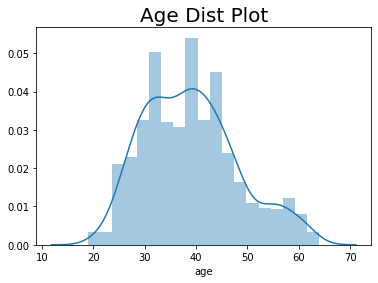

In [58]:
# distplot 1 >>>
plt.title('Age Dist Plot', fontsize = 20)
sns.distplot(df['age'])

Observation: Here in this ditplot Age values are somewhat evenly distributed and skewed a bit.

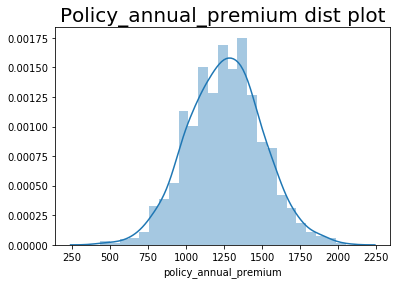

In [59]:
# distplot 2 >>>
plt.title('Policy_annual_premium dist plot', fontsize = 20)
sns.distplot(df['policy_annual_premium'])

Observation: Here in this distplot values are evenly distributed and skewed a bit.

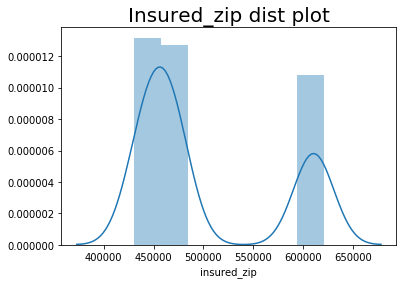

In [60]:
# distplot 3 >>>
plt.title('Insured_zip dist plot', fontsize = 20)
sns.distplot(df['insured_zip'])

Observation: Here in this distplot, values are not evenly distributed.

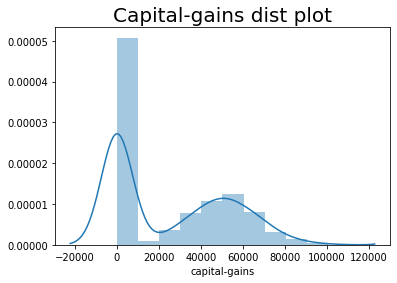

In [61]:
# distplot 4 >>>
plt.title('Capital-gains dist plot', fontsize = 20)
sns.distplot(df['capital-gains'])

Observation: Here in this distplot, values are not evenly distributed and skewed a bit.

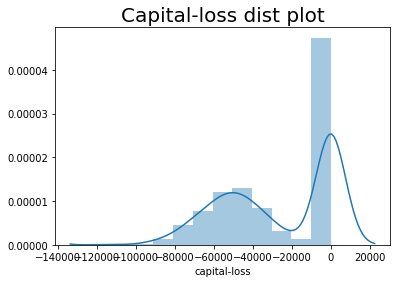

In [62]:
# distplot 5 >>>
plt.title('Capital-loss dist plot', fontsize = 20)
sns.distplot(df['capital-loss'])

Observation: Here in this distplot, values are not evenly distributed and skewed a bit.

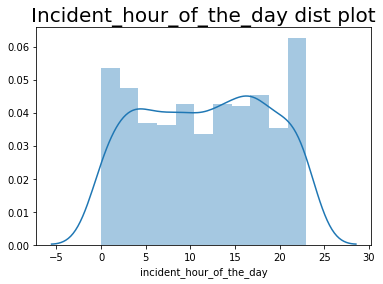

In [63]:
# distplot 6 >>>
plt.title('Incident_hour_of_the_day dist plot', fontsize = 20)
sns.distplot(df['incident_hour_of_the_day'])

Observation: Here in this distplot, values are not evenly distributed.

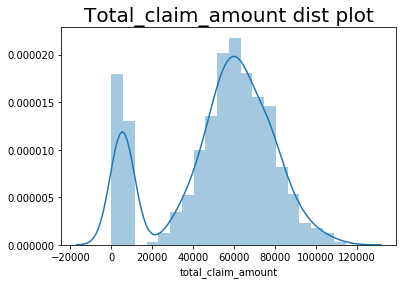

In [64]:
# distplot 7 >>>
plt.title('Total_claim_amount dist plot', fontsize = 20)
sns.distplot(df['total_claim_amount'])

Observation: Here in this distplot, values are not evenly distributed and skewed a bit.

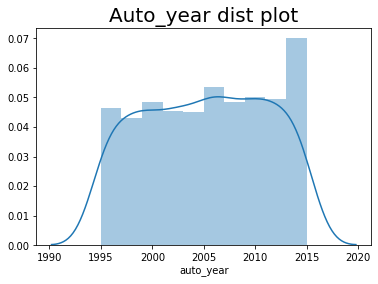

In [65]:
# distplot 8 >>>
plt.title('Auto_year dist plot', fontsize = 20)
sns.distplot(df['auto_year'])

Observation: Here in this distplot, values are little bit evenly distributed.

In [66]:
# checking datatypes of the datasets.
df.dtypes

age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

# BIVARIATE ANALYSIS:

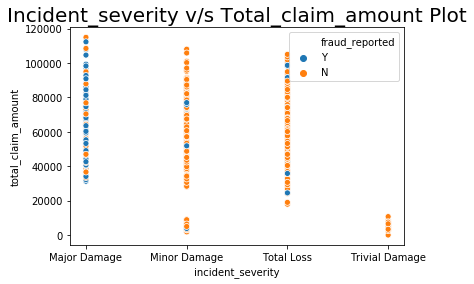

In [67]:
# scatter plot 1 >>>
plt.title('Incident_severity v/s Total_claim_amount Plot', fontsize = 20)

sns.scatterplot(df['incident_severity'], df['total_claim_amount'], hue=df['fraud_reported'])

Observation: We can see from the above scatter plot, fraudulant cases are more in Major Damage cases of Incident_severity column and between moderate to high values of total_claim_amount column.

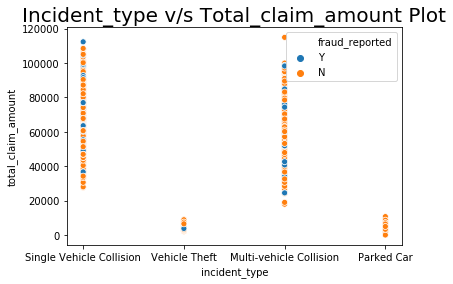

In [68]:
# scatter plot 2 >>>
plt.title('Incident_type v/s Total_claim_amount Plot', fontsize = 20)

sns.scatterplot(df['incident_type'], df['total_claim_amount'], hue=df['fraud_reported'])

Observation: No proper relationship between incidentype and total claim amount column seen.

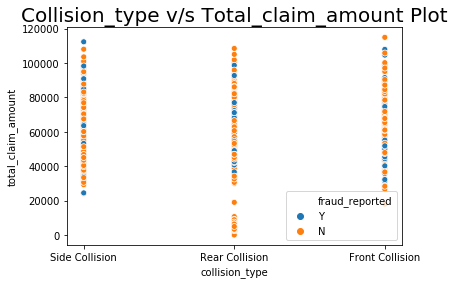

In [69]:
# scatter plot 3 >>>
plt.title('Collision_type v/s Total_claim_amount Plot', fontsize = 20)

sns.scatterplot(df['collision_type'], df['total_claim_amount'], hue=df['fraud_reported'])

obervation: side collision cases has least cases of fraudulant, while Rear collision and front collision has moderate cases of fraudulant.

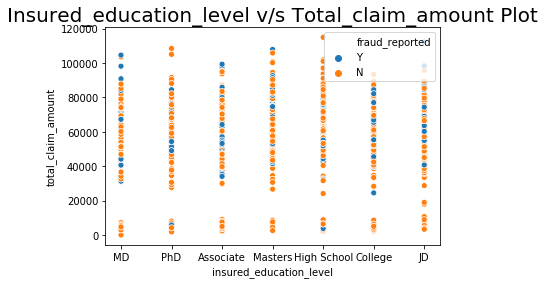

In [70]:
# scatter plot 4 >>>
plt.title('Insured_education_level v/s Total_claim_amount Plot', fontsize = 20)

sns.scatterplot(df['insured_education_level'], df['total_claim_amount'], hue=df['fraud_reported'])

Observation: college and JD education level has moderate cases of fradulant while Masters has minimum cases of fraudulant.

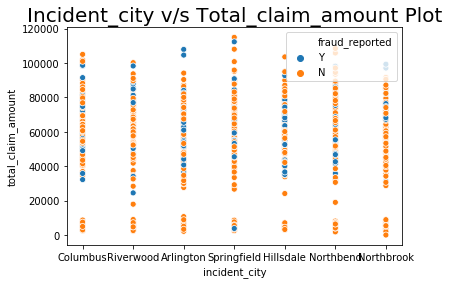

In [71]:
# scatter plot 5 >>>
plt.title('Incident_city v/s Total_claim_amount Plot', fontsize = 20)

sns.scatterplot(df['incident_city'], df['total_claim_amount'], hue=df['fraud_reported'])

Observation: Hillsdale city has maximum cases of fraudulant while Northbrook has minimum cases of fraudulant and other cities has moderate cases of fraudulant.

# LABEL ENCODING THE CATEGORICAL COLUMN:

In [72]:
LE = LabelEncoder()
    
df['policy_state'] = LE.fit_transform(df['policy_state'])
df['policy_csl'] = LE.fit_transform(df['policy_csl'])
df['insured_sex'] = LE.fit_transform(df['insured_sex'])
df['insured_education_level'] = LE.fit_transform(df['insured_education_level'])
df['insured_occupation'] = LE.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = LE.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = LE.fit_transform(df['insured_relationship'])
df['incident_type'] = LE.fit_transform(df['incident_type'])
df['collision_type'] = LE.fit_transform(df['collision_type'])
df['incident_severity'] = LE.fit_transform(df['incident_severity'])
df['authorities_contacted'] = LE.fit_transform(df['authorities_contacted'])
df['incident_state'] = LE.fit_transform(df['incident_state'])
df['incident_city'] = LE.fit_transform(df['incident_city'])
df['incident_location'] = LE.fit_transform(df['incident_location'])
df['property_damage'] = LE.fit_transform(df['property_damage'])
df['police_report_available'] = LE.fit_transform(df['police_report_available'])
df['fraud_reported'] = LE.fit_transform(df['fraud_reported'])

In [73]:
df.head()

,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,48,2,1,1000,1406.91,0,466132,1,4,2,...,1,1,2,1,71610,6510,13020,52080,2004,1
1,42,1,1,2000,1197.22,5000000,468176,1,4,6,...,0,0,0,0,5070,780,780,3510,2007,1
2,29,2,0,2000,1413.14,5000000,430632,0,6,11,...,0,2,3,0,34650,7700,3850,23100,2007,0
3,41,0,1,2000,1415.74,6000000,608117,0,6,1,...,0,1,2,0,63400,6340,6340,50720,2014,1
4,44,0,2,1000,1583.91,6000000,610706,1,0,11,...,0,0,1,0,6500,1300,650,4550,2009,0


# CHECKING CORRELATION MATRIX:

In [74]:
df_cor = df.corr()

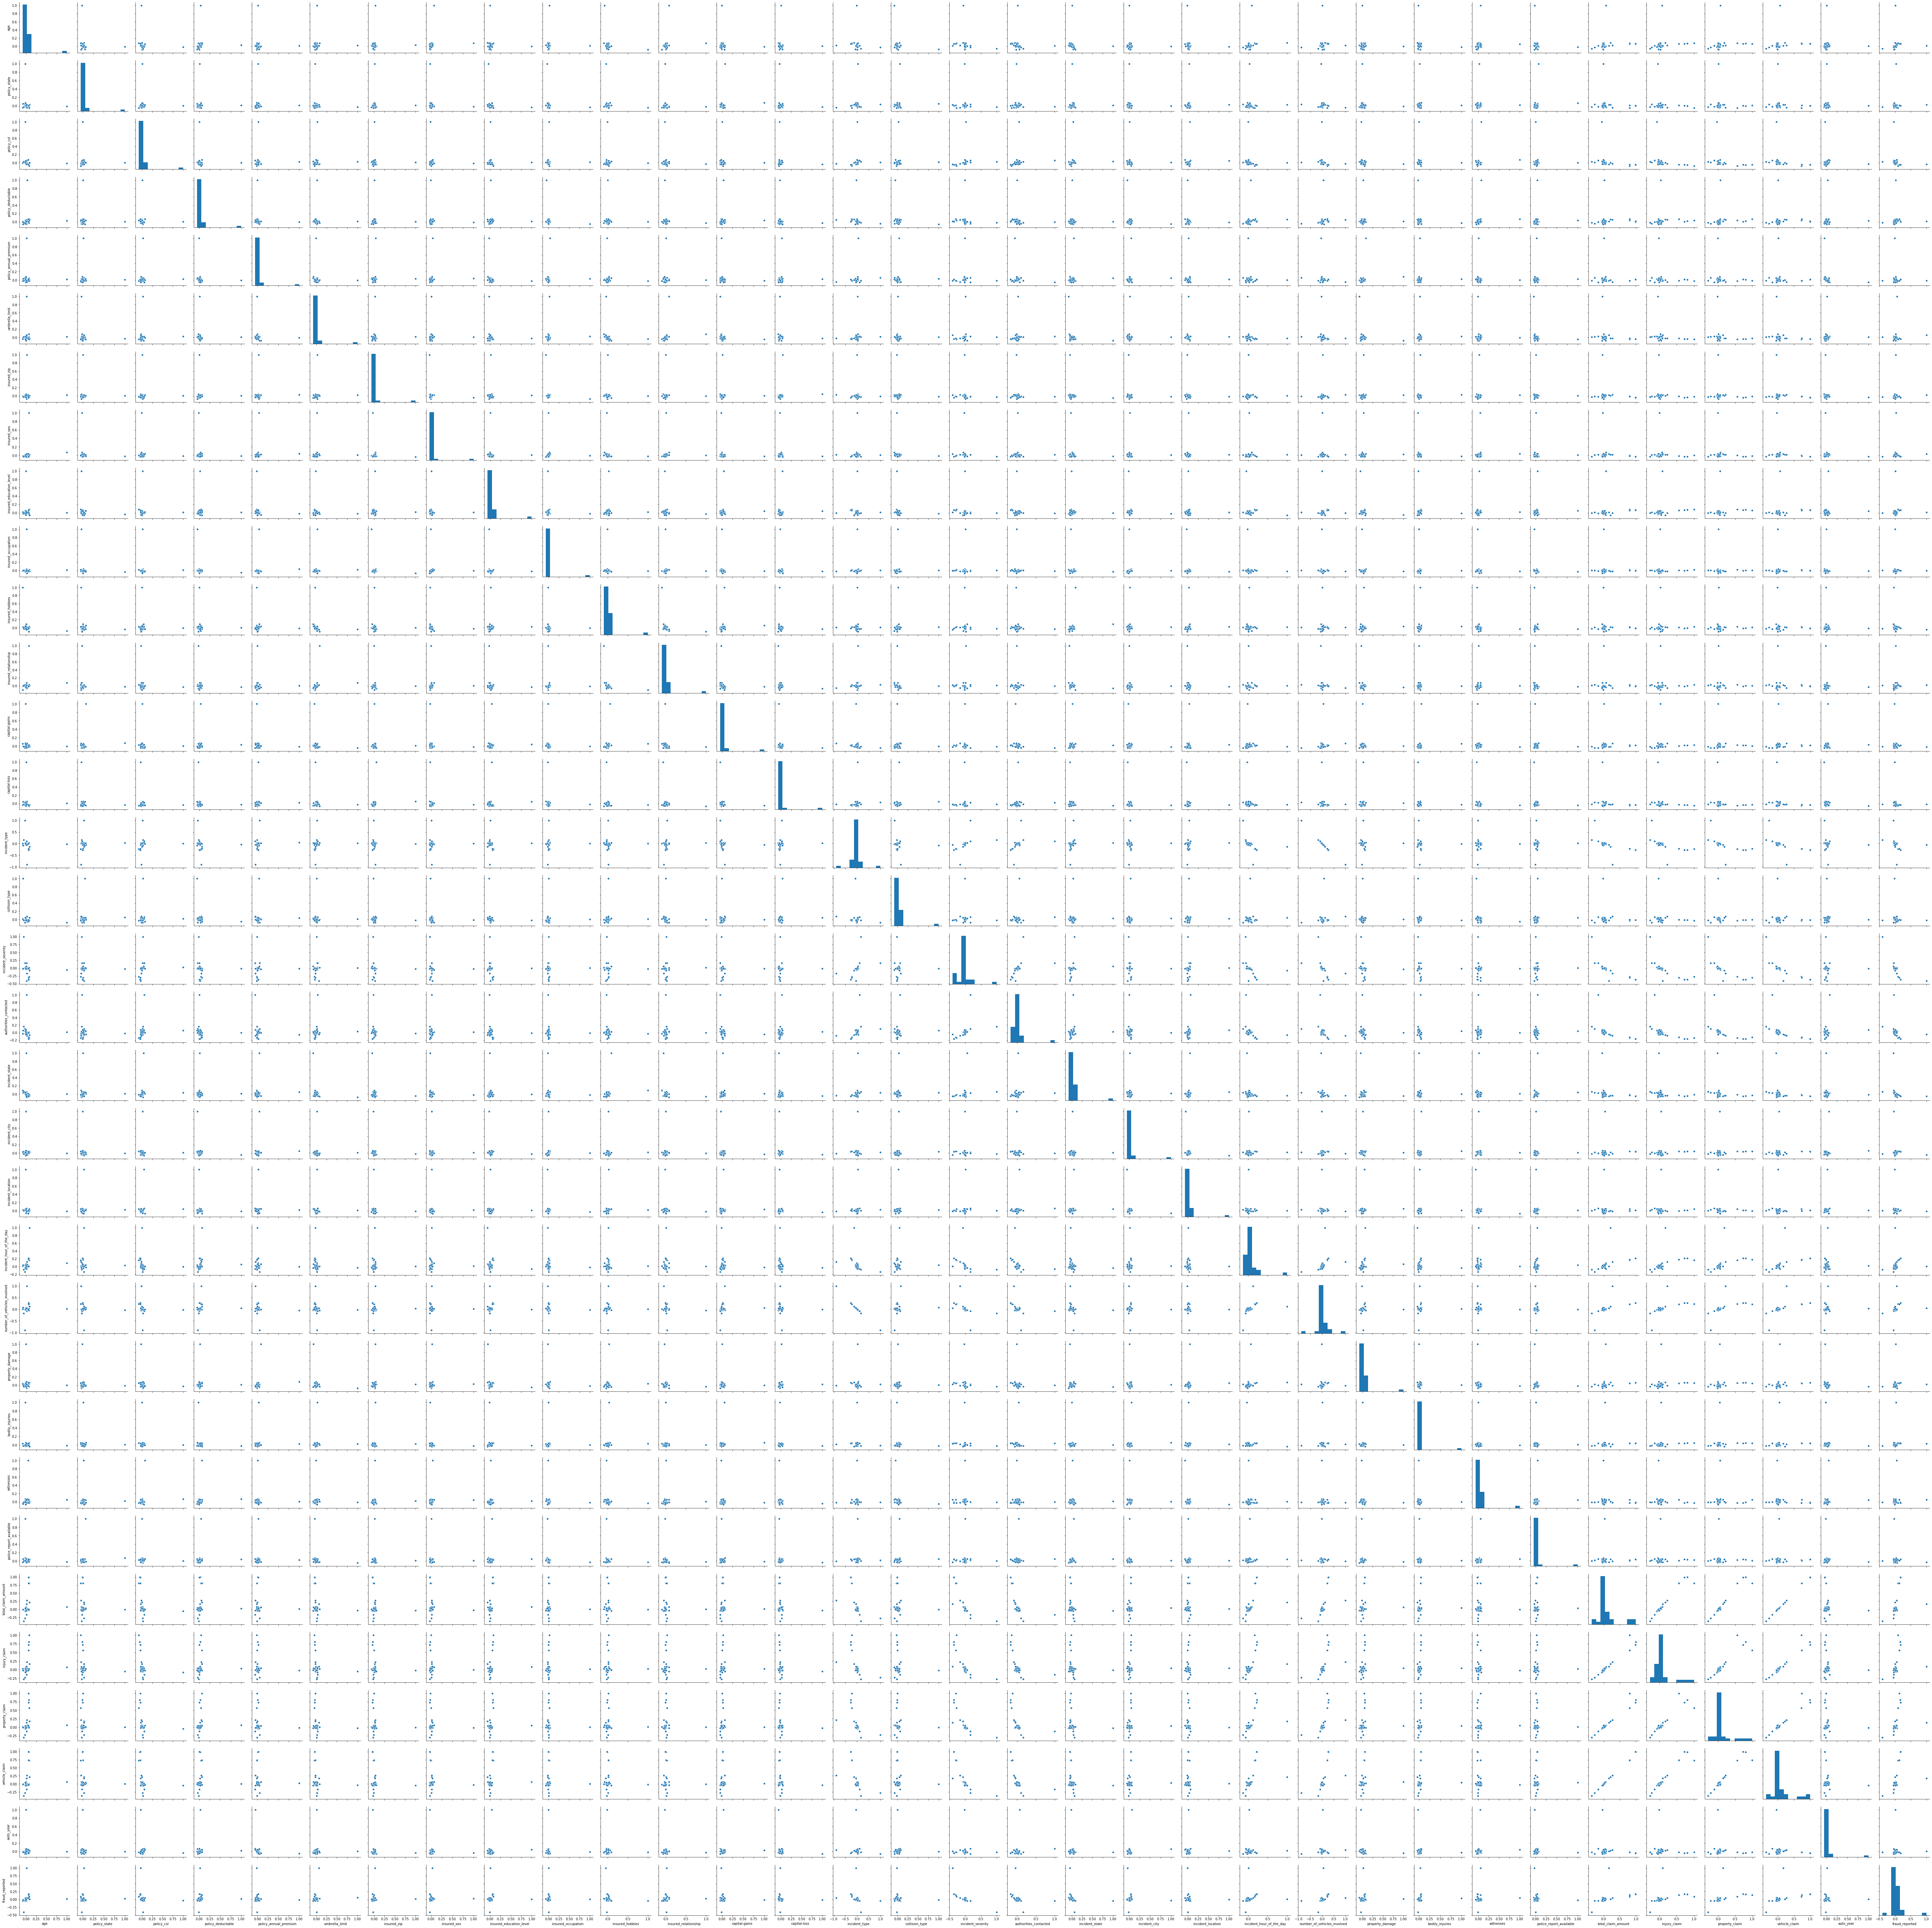

In [75]:
sns.pairplot(df_cor)

# Plotting Heatmap of correlation matrix:

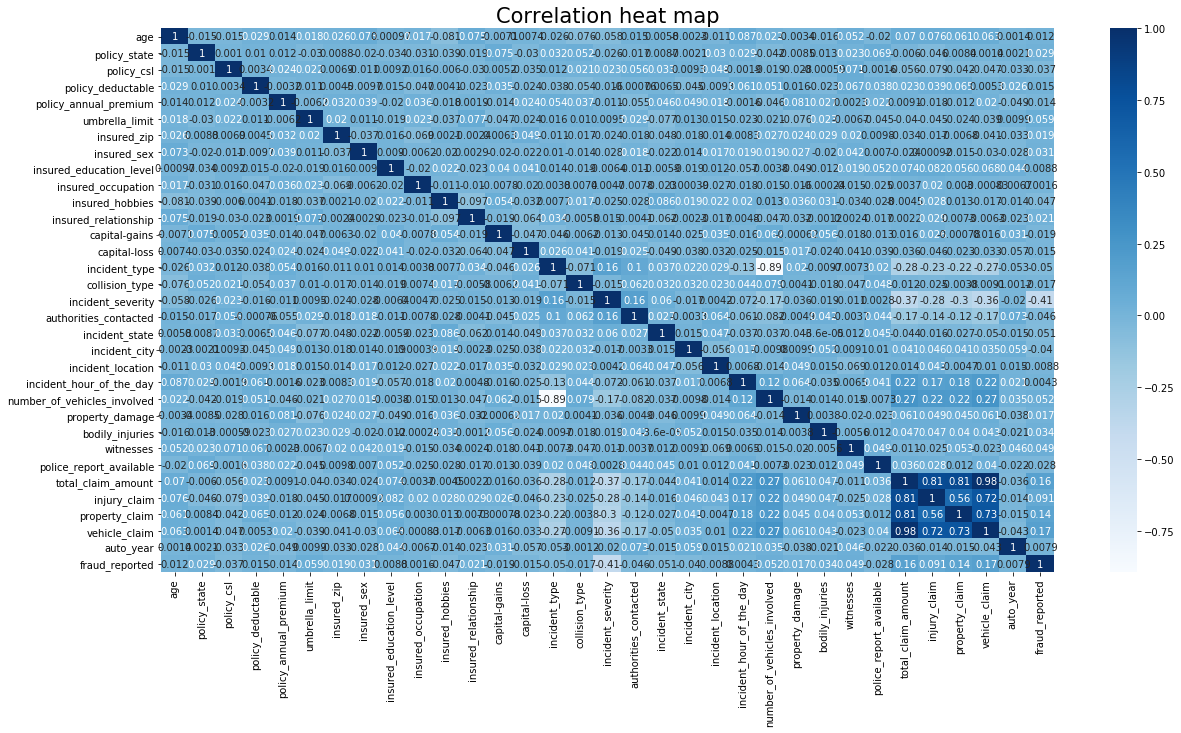

In [76]:
# plotting correlation matrix using heatmap
plt.figure(figsize=(20,10))
plt.title('Correlation heat map', fontsize = 21)

sns.heatmap(df_cor,cmap='Blues', annot=True)

# Observation:

Observation: Incident serverity column is highly correlated with fraud_reported column, though negatively correlated.
    

# Checking amount of skewness:

In [77]:
# checking amount of skewness.
df.skew()

age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777


Observation: There are few columns having skewness like umbrella_limit, insured_zip, total_claim_amount columns, rest of the columns are originally categorical columns

# Removing outliers using Zscore technique:

In [78]:
from scipy.stats import zscore
# removing outliers with the help of zscore methods.
z=np.abs(zscore(df))

In [79]:
threshold = 3
print(np.where(z>threshold))

#creating new dataset without outliers and skewness
df_new = df[(z<3).all(axis=1)]

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 29,  5,  5,  5,  4, 13,
        5,  5,  5], dtype=int64))


# Checking dataloss after outliers removal:

In [80]:
# checking percentage of dataloss after outliers removals.
print(((df.shape[0]-df_new.shape[0])/df.shape[0]*100))

2.0


Observation: After removing outliers we are loosing almost 2% of data, which is very much in limits.
    

# Creating X, Y dataset:

In [81]:
# creating x,y dataset for further model building.
x = df_new.iloc[:,0:32]

In [82]:
x.shape

(980, 32)

In [83]:
y = df_new.iloc[:,-1]

In [84]:
y.shape

(980,)

# SCALING THE DATASET:

In [85]:
#Scaling the dataset::
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled= sc.fit_transform(x)
columnslist = ['age', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

X = pd.DataFrame(x_scaled, columns = columnslist)

# Checking Balancing of the target column:

In [86]:
#Before Balancing the dataset
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

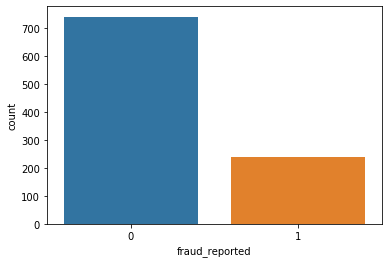

In [87]:
#plotting the imbalanced dataset:

ax = sns.countplot(x='fraud_reported', data = df_new)

OBSERVATION: We can see that our 'Target' i.e. 'fraud_reported' column is not balanced properly.

# BALANCING THE DATASET USING OVERSAMPLING TECHNIQUE:

In [88]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(X, y)

In [89]:
#After Balancing the dataset

y_over.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

OBSERVATION: Now we can see that our dataset is balanced.

# CREATING TRAIN TEST DATASET:

In [90]:
#creating train test dataset from the x and y part inorder to start model making.

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.20, random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1184, 32)
(1184,)
(296, 32)
(296,)


# LOGISTIC REGRESSION METHOD:

In [91]:
# Logistic Regression:

Lgr = LogisticRegression()
Lgr.fit(x_train, y_train)
Lgr_pred_ytest = Lgr.predict(x_test)
print('Accuracy score - ', accuracy_score(y_test, Lgr_pred_ytest))
print('\nConfusion Matrix: ', confusion_matrix(y_test, Lgr_pred_ytest))
print('\nClassification Report: ', classification_report(y_test, Lgr_pred_ytest))

Accuracy score -  0.7466216216216216

Confusion Matrix:  [[ 96  39]
 [ 36 125]]

Classification Report:                precision    recall  f1-score   support

           0       0.73      0.71      0.72       135
           1       0.76      0.78      0.77       161

    accuracy                           0.75       296
   macro avg       0.74      0.74      0.74       296
weighted avg       0.75      0.75      0.75       296



Checking over fitting of the model using cross validation score:

In [92]:
print('Cross validation score: ', cross_val_score(Lgr, x_over, y_over, cv=5).mean())

Cross validation score:  0.7351351351351352


# Gaussian NB Method:

In [93]:
#As there are two target categories present in target column i.e. 'fraud_reported' column.
# We can use GaussianNB algorithm for model making.

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, gnb_pred))
print('\nConfusion Matrix: ', confusion_matrix(y_test, gnb_pred))
print('\nClassification Report: ', classification_report(y_test, gnb_pred))

Accuracy Score:  0.7432432432432432

Confusion Matrix:  [[ 82  53]
 [ 23 138]]

Classification Report:                precision    recall  f1-score   support

           0       0.78      0.61      0.68       135
           1       0.72      0.86      0.78       161

    accuracy                           0.74       296
   macro avg       0.75      0.73      0.73       296
weighted avg       0.75      0.74      0.74       296



Checking over fitting of the model using cross validation score:

In [94]:
print('Cross validation score: ', cross_val_score(gnb, x_over, y_over, cv=5).mean())

Cross validation score:  0.7148648648648648


# DECISION TREE CLASSIFIER METHOD:

In [95]:
# model making using decision tree classifier method:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
dtc_pred_y = dtc.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, dtc_pred_y))
print('\nConfusion Matrix: ', confusion_matrix(y_test, dtc_pred_y))
print('\nClassification Report: ', classification_report(y_test, dtc_pred_y))

Accuracy Score:  0.8378378378378378

Confusion Matrix:  [[107  28]
 [ 20 141]]

Classification Report:                precision    recall  f1-score   support

           0       0.84      0.79      0.82       135
           1       0.83      0.88      0.85       161

    accuracy                           0.84       296
   macro avg       0.84      0.83      0.84       296
weighted avg       0.84      0.84      0.84       296



Checking over fitting of the model using cross validation score:

In [96]:
print('Cross validation score: ', cross_val_score(dtc, x_over, y_over, cv=5).mean())

Cross validation score:  0.8344594594594594


# RANDOM FOREST CLASSIFIER METHOD:

In [97]:
# model making using random forest classifier method.
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc_pred_y = rfc.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, rfc_pred_y))
print('\nConfusion Matrix: ', confusion_matrix(y_test, rfc_pred_y))
print('\nClassification Matrix: ', classification_report(y_test, rfc_pred_y))

Accuracy Score:  0.8783783783783784

Confusion Matrix:  [[121  14]
 [ 22 139]]

Classification Matrix:                precision    recall  f1-score   support

           0       0.85      0.90      0.87       135
           1       0.91      0.86      0.89       161

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296



Checking over fitting of the model using cross validation score:

In [98]:
print('Cross validation score: ', cross_val_score(rfc, x_over, y_over, cv=5).mean())

Cross validation score:  0.8756756756756758


# ADA BOOST CLASSIFIER METHOD:

In [99]:
# model making using ada boost classifier method:

adc = AdaBoostClassifier(n_estimators=100)
adc.fit(x_train, y_train)
adc_pred_y = adc.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, adc_pred_y))
print('\nConfusion Matrix: ', confusion_matrix(y_test, adc_pred_y))
print('\nClassification Report: ', classification_report(y_test, adc_pred_y))

Accuracy Score:  0.8513513513513513

Confusion Matrix:  [[113  22]
 [ 22 139]]

Classification Report:                precision    recall  f1-score   support

           0       0.84      0.84      0.84       135
           1       0.86      0.86      0.86       161

    accuracy                           0.85       296
   macro avg       0.85      0.85      0.85       296
weighted avg       0.85      0.85      0.85       296



Checking over fitting of the model using cross validation score:

In [100]:
print('Cross validation score: ', cross_val_score(adc, x_over, y_over, cv=5).mean())

Cross validation score:  0.8513513513513512


# SUPPORT VECTOR CLASSIFIER METHOD:

In [101]:
# model making using support vector classifier method:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred_y= svc.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, svc_pred_y))
print('\nConfusion Matrix: ', confusion_matrix(y_test, svc_pred_y))
print('\nClassification Report: ',classification_report(y_test, svc_pred_y))

Accuracy Score:  0.8614864864864865

Confusion Matrix:  [[115  20]
 [ 21 140]]

Classification Report:                precision    recall  f1-score   support

           0       0.85      0.85      0.85       135
           1       0.88      0.87      0.87       161

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       296



Checking over fitting of the model using cross validation score:

In [102]:
print('Cross validation score: ', cross_val_score(svc, x_over, y_over, cv=5).mean())

Cross validation score:  0.854054054054054


# KNEAREST NEIGHBOUR CLASSIFIER METHOD:

In [103]:
# model making using Knearest neighbour classifier method:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train, y_train)
knc_pred_y = knc.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, knc_pred_y))
print('\nConfusion Matrix: ', confusion_matrix(y_test, svc_pred_y))
print('\nClassification Report: ', classification_report(y_test, svc_pred_y))

Accuracy Score:  0.7263513513513513

Confusion Matrix:  [[115  20]
 [ 21 140]]

Classification Report:                precision    recall  f1-score   support

           0       0.85      0.85      0.85       135
           1       0.88      0.87      0.87       161

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       296



Checking over fitting of the model using cross validation score:

In [104]:
print('Cross validation score: ', cross_val_score(knc, x_over, y_over, cv=5).mean())

Cross validation score:  0.6817567567567568


# OBSERVATION:

Observation: Decision Tree Classifier is our best fit model, as the accuracy score is also good and  difference between its accuracy score and cross validation score is least, which indicates least overfitting of model.

# HYPER PARAMETER TUNING OF MODEL:

In [105]:
# considering parameters for hyper parameter tuning.
parameters = {'criterion' :  ['gini', 'entropy'],
              'splitter' : ['best', 'random'],
              'min_samples_split' : [1, 2, 3],
             }

In [106]:
gs_dtc = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5)

In [107]:
# Loading data into model
gs_dtc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [108]:
# checking best parameters 
gs_dtc.best_params_

{'criterion': 'gini', 'min_samples_split': 3, 'splitter': 'best'}

# FINAL MODEL MAKING:

In [109]:
# final model making using hyper parameters gained from above model:

dtc_f = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 3, splitter = 'best')
dtc_f.fit(x_train,y_train)
dtc_f.score(x_train,y_train)
dtc_pred_y_f = dtc.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, dtc_pred_y_f))
print('\nConfusion Matrix: ', confusion_matrix(y_test, dtc_pred_y_f))
print('\nClassification Report: ', classification_report(y_test, dtc_pred_y_f))

Accuracy Score:  0.8378378378378378

Confusion Matrix:  [[107  28]
 [ 20 141]]

Classification Report:                precision    recall  f1-score   support

           0       0.84      0.79      0.82       135
           1       0.83      0.88      0.85       161

    accuracy                           0.84       296
   macro avg       0.84      0.83      0.84       296
weighted avg       0.84      0.84      0.84       296



Checking over fitting of the model using cross validation score:

In [110]:
print('Cross validation score: ', cross_val_score(dtc_f, x_over, y_over, cv=5).mean())

Cross validation score:  0.8364864864864865


# OBSERVATION:

OBSERVATION: After hyper parameter tuning also our model's accuracy hasn't changed, so we'll consider this model as our final model.

# AUC ROC CURVE:

In [111]:
# false positive rate: fpr
# true positive rate: tpr
# AUC : Area under curve.
# ROC : Receiver operating characteristic.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [112]:
y_pred_prob = dtc_f.predict_proba(x_test)[:,1]
y_pred_prob

array([1. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 0. ,
       1. , 1. , 0. , 1. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 0. , 1. ,
       1. , 1. , 1. , 1. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. ,
       0. , 1. , 0. , 0.5, 1. , 1. , 0. , 1. , 0. , 1. , 1. , 1. , 1. ,
       1. , 0. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 0. ,
       1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 1. ,
       0. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 1. , 1. , 1. ,
       0. , 1. , 0. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. ,
       0. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 1. ,
       1. , 0. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 1. , 1. ,
       1. , 1. , 1. , 0. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. ,
       0. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 0. ,
       0. , 1. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0.

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, dtc_pred_y_f)

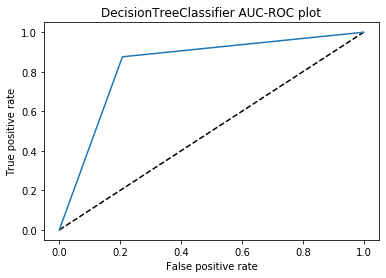

In [114]:
#plotting the tpr and fpr to make the graphs

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'DecisionTreeClassifier AUC-ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier AUC-ROC plot')
plt.show()

OBSERVATION: AUC ROC Curve of our model is having very immediate curvature which indicates perfect model building.

In [115]:
auc_score = roc_auc_score(y_test, dtc_f.predict(x_test))
print(auc_score)

0.824867724867725


OBSERVATION: Our model's AUC ROC Score is 82.48% which is very good.

# SAVING THE MODEL:

In [116]:
import joblib
joblib.dump(dtc_f, 'Vaibhav_Insurance_Claim_Fraud_Detection_Project_Model.pkl')

['Vaibhav_Insurance_Claim_Fraud_Detection_Project_Model.pkl']

# RELOADING THE MODEL:

In [117]:
#Reloading the model and predicting the dataset.
Vaibhav_Insurance_Claim_Fraud_Detection_Project = joblib.load('Vaibhav_Insurance_Claim_Fraud_Detection_Project_Model.pkl')
Vaibhav_Insurance_Claim_Fraud_Detection_Project.predict(x_train)

array([1, 1, 0, ..., 0, 0, 1])

# CONCLUSION:

OUR MODEL IS HAVING ACCURACY OF 83.78 % WHICH IS VERY GOOD.

# THANK YOU